We are using 80,000 points each of 40000 positive reviews and 40000 negative reviews and run the brute algorithm,As it is an imbalanced dataset we are using both f1 as well as accuracy score for swlection of our hyperparameter 


In [12]:
#Bag of words
import pickle
import numpy as np
with open('Bagofwords.pkl','rb') as f:
    final_counts = pickle.load(f)

final_counts

<68225x30969 sparse matrix of type '<class 'numpy.int64'>'
	with 2194297 stored elements in Compressed Sparse Row format>

In [3]:
with open('final.pkl', 'rb') as f:
        final=pickle.load( f)
final.shape



(9611, 10)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from prettytable import PrettyTable
import pickle

#loading all the packages

C:\Users\Soham.Dutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
#determing the dependent and the target variable
X=(final_counts[:,:])

y=np.array(final["Score"]) #making the score column of dataframe to numpy array

len(y)

68225

 Now we run the whole code using brute mechanism

In [16]:
#brute alogorithm 
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)
acc_sc=[]
f1_sc=[]
for i in range(1,30,2):
     knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'brute')

    # fitting the model on crossvalidation train
     knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
     pred = knn.predict(X_cv)

    # evaluate CV accuracy
     acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
     acc_sc.append(acc)
     f1=f1_score(y_cv, pred) * float(100)
     f1_sc.append(f1)
     print('\nCV accuracy for k = %d is %d%%' % (i, acc))
     print('\nf1 for k = %d is %d%%' % (i, f1))


 



CV accuracy for k = 1 is 65%

f1 for k = 1 is 69%

CV accuracy for k = 3 is 68%

f1 for k = 3 is 72%

CV accuracy for k = 5 is 69%

f1 for k = 5 is 74%

CV accuracy for k = 7 is 70%

f1 for k = 7 is 75%

CV accuracy for k = 9 is 71%

f1 for k = 9 is 75%

CV accuracy for k = 11 is 71%

f1 for k = 11 is 76%

CV accuracy for k = 13 is 71%

f1 for k = 13 is 76%

CV accuracy for k = 15 is 72%

f1 for k = 15 is 76%

CV accuracy for k = 17 is 71%

f1 for k = 17 is 76%

CV accuracy for k = 19 is 71%

f1 for k = 19 is 76%

CV accuracy for k = 21 is 72%

f1 for k = 21 is 77%

CV accuracy for k = 23 is 72%

f1 for k = 23 is 77%

CV accuracy for k = 25 is 72%

f1 for k = 25 is 77%

CV accuracy for k = 27 is 72%

f1 for k = 27 is 77%

CV accuracy for k = 29 is 71%

f1 for k = 29 is 77%


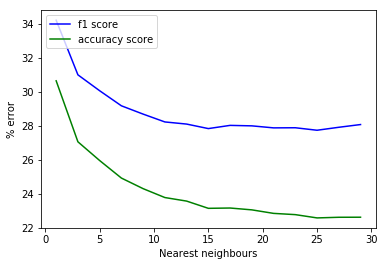

In [17]:
error_ac=[]
error_f1=[]
error_ac=[100-x for x in acc_sc]
error_f1=[100-x for x in f1_sc]
 
n=np.arange(1,30,2)
plt.plot(n,error_ac,color='b',label="f1 score")
plt.plot(n,error_f1,color='g',label="accuracy score")
plt.xlabel("Nearest neighbours")
plt.ylabel("% error")
pylab.legend(loc='upper left')



plt.show()


So with k=29 we get the highest accuracy (f1 score) with brute force alorithm 

In [18]:
knn = KNeighborsClassifier(29,algorithm='brute')
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
f1=f1_score(y_test, pred)* float(100)
print('\n****Test accuracy for k = 29 is %d%%' % (acc))
print('\n****f1 accuracy for k = 29 is %d%%' % (acc))



****Test accuracy for k = 29 is 72%

****f1 accuracy for k = 29 is 72%


[[4971 4456]
 [1217 9824]]


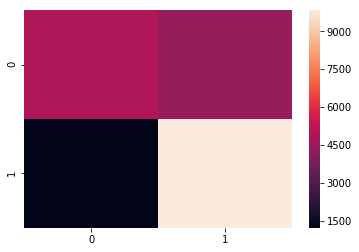

In [19]:
#building the confusion matrix 
con_mat=confusion_matrix(y_test,pred)
print(con_mat)
sns.heatmap(con_mat)


So we can see that f1 score has reduced for y test 

TF-IDF

In [23]:
with open('tfidf.pkl', 'rb') as f:
    final_tf_idf=pickle.load(f)
final_tf_idf.shape

(68225, 987390)

In [24]:
X=final_tf_idf
y=np.array(final["Score"])
len(y)

68225

Brute algoritm of TF-IDF


CV accuracy for k = 1 is 69%

f1 for k = 1 is 72%

CV accuracy for k = 3 is 72%

f1 for k = 3 is 75%

CV accuracy for k = 5 is 74%

f1 for k = 5 is 77%

CV accuracy for k = 7 is 75%

f1 for k = 7 is 78%

CV accuracy for k = 9 is 76%

f1 for k = 9 is 79%

CV accuracy for k = 11 is 76%

f1 for k = 11 is 79%

CV accuracy for k = 13 is 76%

f1 for k = 13 is 79%

CV accuracy for k = 15 is 77%

f1 for k = 15 is 80%

CV accuracy for k = 17 is 77%

f1 for k = 17 is 80%

CV accuracy for k = 19 is 77%

f1 for k = 19 is 80%

CV accuracy for k = 21 is 77%

f1 for k = 21 is 80%

CV accuracy for k = 23 is 77%

f1 for k = 23 is 81%

CV accuracy for k = 25 is 77%

f1 for k = 25 is 81%

CV accuracy for k = 27 is 77%

f1 for k = 27 is 81%

CV accuracy for k = 29 is 77%

f1 for k = 29 is 81%


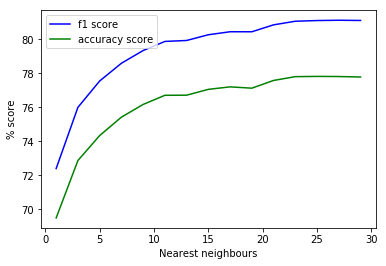

In [25]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)
acc_sc=[]
f1_sc=[]
for i in range(1,30,2):
     knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'brute')

    # fitting the model on crossvalidation train
     knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
     pred = knn.predict(X_cv)

    # evaluate CV accuracy
     acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
     acc_sc.append(acc)
     f1=f1_score(y_cv, pred) * float(100)
     f1_sc.append(f1)
     print('\nCV accuracy for k = %d is %d%%' % (i, acc))
     print('\nf1 for k = %d is %d%%' % (i, f1))

     
 
n_k=np.arange(1,30,2)
plt.plot(n_k,f1_sc,color='b',label="f1 score")
plt.plot(n_k,acc_sc,color='g',label="accuracy score")
plt.xlabel("Nearest neighbours")
plt.ylabel("% score")
pylab.legend(loc='upper left')



plt.show()

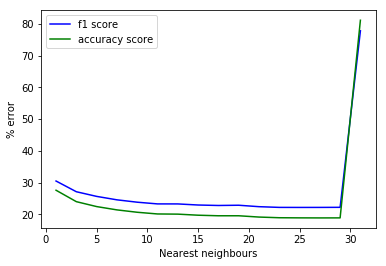

In [39]:
error_ac=[]
error_f1=[]
error_ac=[100-x for x in acc_sc]
error_f1=[100-x for x in f1_sc]
 
n=np.arange(1,32,2)
plt.plot(n,error_ac,color='b',label="f1 score")
plt.plot(n,error_f1,color='g',label="accuracy score")
plt.xlabel("Nearest neighbours")
plt.ylabel("% error")
pylab.legend(loc='upper left')



plt.show()


so we will go for k = 29 again 


****Test accuracy for k = 29 is 78%
[[6161 3266]
 [1199 9842]]


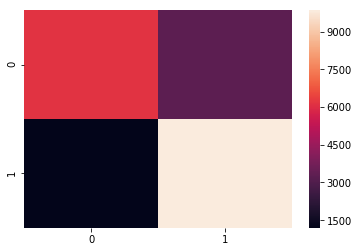

In [40]:
knn = KNeighborsClassifier(29,algorithm='brute')
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 29 is %d%%' % (acc))
con_mat=confusion_matrix(y_test,pred)
print(con_mat)
sns.heatmap(con_mat)




In [43]:
#averageW2Vector
with open('AverageW2V.pkl', 'rb') as f:
    sent_vectors=pickle.load(f)



In [44]:
X=sent_vectors
y=np.array(final["Score"]) #making the score column of dataframe to numpy array
len(y)

68225

In [48]:
X=sent_vectors
y=np.array(final["Score"]) #making the score column of dataframe to numpy array
len(y)

X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)
acc_sc=[]
f1_sc=[]
for i in range(1,30,2):
     knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'brute')

    # fitting the model on crossvalidation train
     knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
     pred = knn.predict(X_cv)

    # evaluate CV accuracy
     acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
     acc_sc.append(acc)
     f1=f1_score(y_cv, pred) * float(100)
     f1_sc.append(f1)
     print('\nCV accuracy for k = %d is %d%%' % (i, acc))
     print('\nf1 for k = %d is %d%%' % (i, f1))

     
 




CV accuracy for k = 1 is 75%

f1 for k = 1 is 77%

CV accuracy for k = 3 is 79%

f1 for k = 3 is 80%

CV accuracy for k = 5 is 80%

f1 for k = 5 is 81%

CV accuracy for k = 7 is 80%

f1 for k = 7 is 82%

CV accuracy for k = 9 is 81%

f1 for k = 9 is 82%

CV accuracy for k = 11 is 81%

f1 for k = 11 is 82%

CV accuracy for k = 13 is 81%

f1 for k = 13 is 82%

CV accuracy for k = 15 is 81%

f1 for k = 15 is 83%

CV accuracy for k = 17 is 81%

f1 for k = 17 is 83%

CV accuracy for k = 19 is 82%

f1 for k = 19 is 83%

CV accuracy for k = 21 is 81%

f1 for k = 21 is 83%

CV accuracy for k = 23 is 81%

f1 for k = 23 is 83%

CV accuracy for k = 25 is 81%

f1 for k = 25 is 83%

CV accuracy for k = 27 is 81%

f1 for k = 27 is 83%

CV accuracy for k = 29 is 81%

f1 for k = 29 is 83%


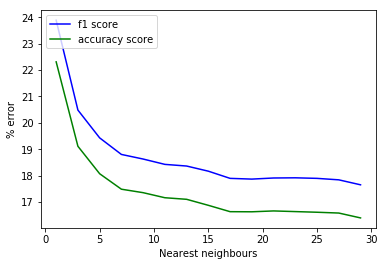

In [46]:
error_ac=[]
error_f1=[]
error_ac=[100-x for x in acc_sc]
error_f1=[100-x for x in f1_sc]
 
n=np.arange(1,30,2)
plt.plot(n,error_ac,color='b',label="f1 score")
plt.plot(n,error_f1,color='g',label="accuracy score")
plt.xlabel("Nearest neighbours")
plt.ylabel("% error")
pylab.legend(loc='upper left')


plt.show()


****Test accuracy for k = 29 is 82%
[[7533 1894]
 [1668 9373]]


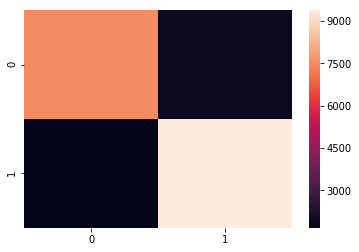

In [47]:
knn = KNeighborsClassifier(29,algorithm='brute')
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 29 is %d%%' % (acc))
con_mat=confusion_matrix(y_test,pred)
print(con_mat)
sns.heatmap(con_mat)


So the accuracy of AvgW2v is very high 

In [4]:
with open('weightedTFIDF.pkl', 'rb') as f:
    tfidf_sent_vectors= pickle.load(f)


In [7]:
X=tfidf_sent_vectors
y=np.array(final["Score"]) #making the score column of dataframe to numpy array
len(y)

68225

In [8]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)
acc_sc=[]
f1_sc=[]
for i in range(1,30,2):
     knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'brute')

    # fitting the model on crossvalidation train
     knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
     pred = knn.predict(X_cv)

    # evaluate CV accuracy
     acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
     acc_sc.append(acc)
     f1=f1_score(y_cv, pred) * float(100)
     f1_sc.append(f1)
     print('\nCV accuracy for k = %d is %d%%' % (i, acc))
     print('\nf1 for k = %d is %d%%' % (i, f1))



CV accuracy for k = 1 is 73%

f1 for k = 1 is 74%

CV accuracy for k = 3 is 76%

f1 for k = 3 is 77%

CV accuracy for k = 5 is 77%

f1 for k = 5 is 79%

CV accuracy for k = 7 is 78%

f1 for k = 7 is 79%

CV accuracy for k = 9 is 78%

f1 for k = 9 is 80%

CV accuracy for k = 11 is 78%

f1 for k = 11 is 80%

CV accuracy for k = 13 is 78%

f1 for k = 13 is 80%

CV accuracy for k = 15 is 79%

f1 for k = 15 is 81%

CV accuracy for k = 17 is 79%

f1 for k = 17 is 81%

CV accuracy for k = 19 is 79%

f1 for k = 19 is 81%

CV accuracy for k = 21 is 79%

f1 for k = 21 is 81%

CV accuracy for k = 23 is 80%

f1 for k = 23 is 81%

CV accuracy for k = 25 is 79%

f1 for k = 25 is 81%

CV accuracy for k = 27 is 79%

f1 for k = 27 is 81%

CV accuracy for k = 29 is 79%

f1 for k = 29 is 81%


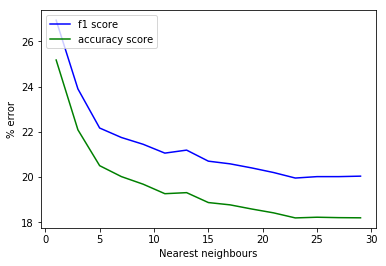

In [9]:
error_ac=[]
error_f1=[]
error_ac=[100-x for x in acc_sc]
error_f1=[100-x for x in f1_sc]
 
n=np.arange(1,30,2)
plt.plot(n,error_ac,color='b',label="f1 score")
plt.plot(n,error_f1,color='g',label="accuracy score")
plt.xlabel("Nearest neighbours")
plt.ylabel("% error")
pylab.legend(loc='upper left')


plt.show()

In [10]:
knn = KNeighborsClassifier(29,algorithm='brute')
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 29 is %d%%' % (acc))


    



****Test accuracy for k = 29 is 79%


[[7085 2342]
 [1851 9190]]


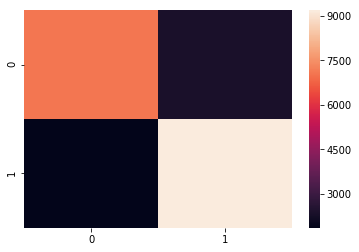

In [11]:
con_mat=confusion_matrix(y_test,pred)
print(con_mat)
sns.heatmap(con_mat)


So from the above results we can conclude that AVG w2v is the best method for classification of this dataset as it gives the highest accuracy

Now we are going to run the KD-tree algorithm,as KD-tree is a ardous algorithm we have reduced the data set to 30000 ponts 15k each of positive and negative reviews

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from prettytable import PrettyTable
import pickle


C:\Users\Soham.Dutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
with open('final.pkl', 'rb') as f:
        final=pickle.load( f)
final.shape


(9611, 10)

In [6]:
#Bag of words

with open('Bagofwords.pkl','rb') as f:
    final_counts = pickle.load(f)

final_counts=final_counts.todense()
final_counts

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
#determing the dependent and the target variable
X=(final_counts[:,:])

y=np.array(final["Score"]) #making the score column of dataframe to numpy array

len(y)

9611

In [5]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)
acc_sc=[]
f1_sc=[]
for i in range(1,30,2):
     knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'kd_tree')

    # fitting the model on crossvalidation train
     knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
     pred = knn.predict(X_cv)

    # evaluate CV accuracy
     acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
     acc_sc.append(acc)
     f1=f1_score(y_cv, pred) * float(100)
     f1_sc.append(f1)
     print('\nCV accuracy for k = %d is %d%%' % (i, acc))
     print('\nf1 for k = %d is %d%%' % (i, f1))

     
 



CV accuracy for k = 1 is 62%

f1 for k = 1 is 59%

CV accuracy for k = 3 is 65%

f1 for k = 3 is 63%

CV accuracy for k = 5 is 65%

f1 for k = 5 is 64%

CV accuracy for k = 7 is 67%

f1 for k = 7 is 66%

CV accuracy for k = 9 is 67%

f1 for k = 9 is 67%

CV accuracy for k = 11 is 68%

f1 for k = 11 is 69%

CV accuracy for k = 13 is 69%

f1 for k = 13 is 70%

CV accuracy for k = 15 is 69%

f1 for k = 15 is 70%

CV accuracy for k = 17 is 70%

f1 for k = 17 is 71%

CV accuracy for k = 19 is 70%

f1 for k = 19 is 71%

CV accuracy for k = 21 is 70%

f1 for k = 21 is 71%

CV accuracy for k = 23 is 70%

f1 for k = 23 is 72%

CV accuracy for k = 25 is 71%

f1 for k = 25 is 72%

CV accuracy for k = 27 is 71%

f1 for k = 27 is 72%

CV accuracy for k = 29 is 71%

f1 for k = 29 is 73%


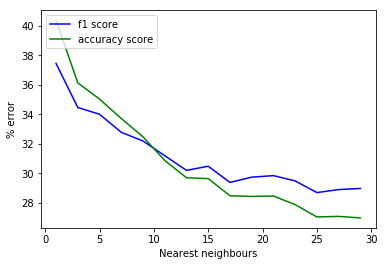

In [6]:
error_ac=[]
error_f1=[]
error_ac=[100-x for x in acc_sc]
error_f1=[100-x for x in f1_sc]
 
n=np.arange(1,30,2)
plt.plot(n,error_ac,color='b',label="f1 score")
plt.plot(n,error_f1,color='g',label="accuracy score")
plt.xlabel("Nearest neighbours")
plt.ylabel("% error")
pylab.legend(loc='upper left')


plt.show()

In [7]:
knn = KNeighborsClassifier(29,algorithm='kd_tree')
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 29 is %d%%' % (acc))


    



****Test accuracy for k = 29 is 70%


[[1687 1001]
 [ 648 2268]]


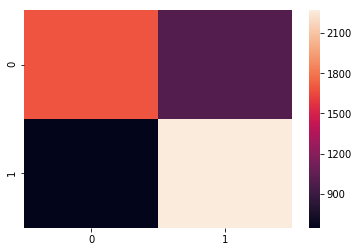

In [8]:
con_mat=confusion_matrix(y_test,pred)
print(con_mat)
sns.heatmap(con_mat)


For TF-IDF we take 10k points 


In [3]:
with open('tfidf.pkl', 'rb') as f:
    final_tf_idf=pickle.load(f)
final_tf_idf.shape
final_tf_idf=final_tf_idf.todense()

In [8]:
X=final_tf_idf
y=np.array(final["Score"])
len(y)

9611

In [9]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)
acc_sc=[]
f1_sc=[]
for i in range(1,30,2):
     knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'kd_tree')

    # fitting the model on crossvalidation train
     knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
     pred = knn.predict(X_cv)

    # evaluate CV accuracy
     acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
     acc_sc.append(acc)
     f1=f1_score(y_cv, pred) * float(100)
     f1_sc.append(f1)
     print('\nCV accuracy for k = %d is %d%%' % (i, acc))
     print('\nf1 for k = %d is %d%%' % (i, f1))

     


CV accuracy for k = 1 is 70%

f1 for k = 1 is 72%

CV accuracy for k = 3 is 73%

f1 for k = 3 is 75%

CV accuracy for k = 5 is 73%

f1 for k = 5 is 75%

CV accuracy for k = 7 is 74%

f1 for k = 7 is 77%

CV accuracy for k = 9 is 77%

f1 for k = 9 is 79%

CV accuracy for k = 11 is 76%

f1 for k = 11 is 78%

CV accuracy for k = 13 is 75%

f1 for k = 13 is 78%

CV accuracy for k = 15 is 76%

f1 for k = 15 is 78%

CV accuracy for k = 17 is 76%

f1 for k = 17 is 79%

CV accuracy for k = 19 is 76%

f1 for k = 19 is 79%

CV accuracy for k = 21 is 77%

f1 for k = 21 is 79%

CV accuracy for k = 23 is 76%

f1 for k = 23 is 78%

CV accuracy for k = 25 is 76%

f1 for k = 25 is 79%

CV accuracy for k = 27 is 76%

f1 for k = 27 is 79%

CV accuracy for k = 29 is 77%

f1 for k = 29 is 79%


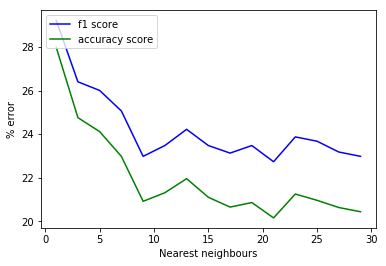

In [10]:
error_ac=[]
error_f1=[]
error_ac=[100-x for x in acc_sc]
error_f1=[100-x for x in f1_sc]
 
n=np.arange(1,30,2)
plt.plot(n,error_ac,color='b',label="f1 score")
plt.plot(n,error_f1,color='g',label="accuracy score")
plt.xlabel("Nearest neighbours")
plt.ylabel("% error")
pylab.legend(loc='upper left')


plt.show()


****Test accuracy for k = 29 is 79%
[[ 982  423]
 [ 172 1307]]


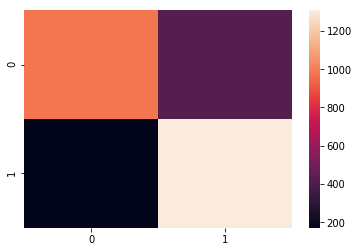

In [11]:
knn = KNeighborsClassifier(29,algorithm='kd_tree')
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 29 is %d%%' % (acc))
con_mat=confusion_matrix(y_test,pred)
print(con_mat)
sns.heatmap(con_mat)



In [16]:
#averageW2Vector
with open('AverageW2V.pkl', 'rb') as f:
    sent_vectors=pickle.load(f)
sent_vectors



[array([-0.28001134, -0.08983282, -0.17629657,  0.2202993 , -0.16033481,
        -0.98403017,  0.50800214, -0.43956241, -0.28356306, -0.08136675,
        -0.0117561 , -0.03842135,  0.13022536, -0.24084385, -0.01705483,
         0.37403466,  0.09038113, -0.28137124, -0.15750228, -0.46999618,
         0.28756709,  0.60385142,  0.1497255 , -0.49517934,  0.09641152,
         0.27808639,  0.07914701,  0.32281891, -0.23395682,  0.24003647,
        -0.17713031, -0.30483688, -0.17779886, -0.41033212,  0.27419675,
        -0.25168845,  0.12189459, -0.34258481,  0.25546497,  0.01624502,
         0.12997599, -0.11269847, -0.18663519,  0.35246142,  0.11430949,
        -0.16608352, -0.62428547,  0.31323692, -0.28077747, -0.17473188]),
 array([-0.29471322, -0.05730189, -0.27259111,  0.17692579, -0.16942929,
        -0.90552479,  0.46211966, -0.38892179, -0.26576624, -0.0457451 ,
        -0.02084525, -0.03453613,  0.11832698, -0.19091963, -0.02115417,
         0.37891505,  0.04495111, -0.21643782, -0

In [14]:
X=sent_vectors
y=np.array(final["Score"]) #making the score column of dataframe to numpy array
len(y)

X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)
acc_sc=[]
f1_sc=[]
for i in range(1,30,2):
     knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'kd_tree')

    # fitting the model on crossvalidation train
     knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
     pred = knn.predict(X_cv)

    # evaluate CV accuracy
     acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
     acc_sc.append(acc)
     f1=f1_score(y_cv, pred) * float(100)
     f1_sc.append(f1)
     print('\nCV accuracy for k = %d is %d%%' % (i, acc))
     print('\nf1 for k = %d is %d%%' % (i, f1))

     
 


CV accuracy for k = 1 is 68%

f1 for k = 1 is 69%

CV accuracy for k = 3 is 71%

f1 for k = 3 is 72%

CV accuracy for k = 5 is 71%

f1 for k = 5 is 72%

CV accuracy for k = 7 is 72%

f1 for k = 7 is 73%

CV accuracy for k = 9 is 72%

f1 for k = 9 is 72%

CV accuracy for k = 11 is 73%

f1 for k = 11 is 73%

CV accuracy for k = 13 is 73%

f1 for k = 13 is 73%

CV accuracy for k = 15 is 73%

f1 for k = 15 is 74%

CV accuracy for k = 17 is 73%

f1 for k = 17 is 74%

CV accuracy for k = 19 is 74%

f1 for k = 19 is 74%

CV accuracy for k = 21 is 73%

f1 for k = 21 is 74%

CV accuracy for k = 23 is 73%

f1 for k = 23 is 74%

CV accuracy for k = 25 is 73%

f1 for k = 25 is 74%

CV accuracy for k = 27 is 74%

f1 for k = 27 is 74%

CV accuracy for k = 29 is 74%

f1 for k = 29 is 74%


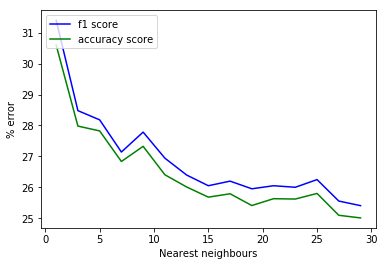

In [17]:
error_ac=[]
error_f1=[]
error_ac=[100-x for x in acc_sc]
error_f1=[100-x for x in f1_sc]
 
n=np.arange(1,30,2)
plt.plot(n,error_ac,color='b',label="f1 score")
plt.plot(n,error_f1,color='g',label="accuracy score")
plt.xlabel("Nearest neighbours")
plt.ylabel("% error")
pylab.legend(loc='upper left')


plt.show()


****Test accuracy for k = 29 is 75%
[[1075  330]
 [ 375 1104]]


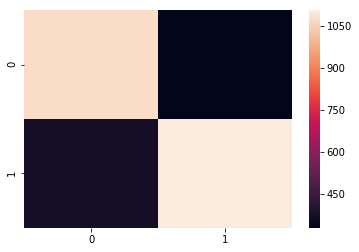

In [18]:
knn = KNeighborsClassifier(29,algorithm='kd_tree')
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 29 is %d%%' % (acc))
con_mat=confusion_matrix(y_test,pred)
print(con_mat)
sns.heatmap(con_mat)



In [19]:
#WeightedTF-IDF
with open('weightedTFIDF.pkl', 'rb') as f:
    tfidf_sent_vectors= pickle.load(f)


In [20]:
X=tfidf_sent_vectors
y=np.array(final["Score"]) #making the score column of dataframe to numpy array
len(y)

9611

In [21]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)
acc_sc=[]
f1_sc=[]
for i in range(1,30,2):
     knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'kd_tree')

    # fitting the model on crossvalidation train
     knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
     pred = knn.predict(X_cv)

    # evaluate CV accuracy
     acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
     acc_sc.append(acc)
     f1=f1_score(y_cv, pred) * float(100)
     f1_sc.append(f1)
     print('\nCV accuracy for k = %d is %d%%' % (i, acc))
     print('\nf1 for k = %d is %d%%' % (i, f1))

     


CV accuracy for k = 1 is 66%

f1 for k = 1 is 67%

CV accuracy for k = 3 is 68%

f1 for k = 3 is 69%

CV accuracy for k = 5 is 68%

f1 for k = 5 is 70%

CV accuracy for k = 7 is 70%

f1 for k = 7 is 72%

CV accuracy for k = 9 is 71%

f1 for k = 9 is 72%

CV accuracy for k = 11 is 70%

f1 for k = 11 is 72%

CV accuracy for k = 13 is 70%

f1 for k = 13 is 72%

CV accuracy for k = 15 is 70%

f1 for k = 15 is 72%

CV accuracy for k = 17 is 70%

f1 for k = 17 is 72%

CV accuracy for k = 19 is 71%

f1 for k = 19 is 72%

CV accuracy for k = 21 is 70%

f1 for k = 21 is 72%

CV accuracy for k = 23 is 71%

f1 for k = 23 is 73%

CV accuracy for k = 25 is 71%

f1 for k = 25 is 73%

CV accuracy for k = 27 is 71%

f1 for k = 27 is 72%

CV accuracy for k = 29 is 71%

f1 for k = 29 is 73%


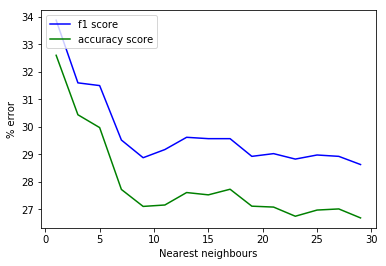

In [22]:
error_ac=[]
error_f1=[]
error_ac=[100-x for x in acc_sc]
error_f1=[100-x for x in f1_sc]
 
n=np.arange(1,30,2)
plt.plot(n,error_ac,color='b',label="f1 score")
plt.plot(n,error_f1,color='g',label="accuracy score")
plt.xlabel("Nearest neighbours")
plt.ylabel("% error")
pylab.legend(loc='upper left')


plt.show()


****Test accuracy for k = 29 is 73%
[[ 952  453]
 [ 316 1163]]


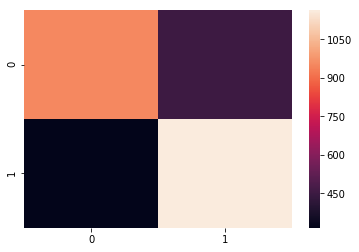

In [23]:
knn = KNeighborsClassifier(29,algorithm='kd_tree')
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 29 is %d%%' % (acc))
con_mat=confusion_matrix(y_test,pred)
print(con_mat)
sns.heatmap(con_mat)



In [10]:
x=PrettyTable()
x.field_names=["Methodology","Algorithm","n-neighbours","Accuracy"]
x.add_row(["Bag of Words","Brute",29,"72%"])
x.add_row(["Bag of Words","Kd-tree",29,"70%"])
x.add_row(["TF-IDF","Brute",29,"78%"])
x.add_row(["TF-IDF","Kd-tree",29,"79%"])
x.add_row(["AVgWord2vec","Brute",29,"82%"])
x.add_row(["AVgWord2vec","Kd-tree",29,"75%"])
x.add_row(["WeightedTF-IDF","Brute",29,"79%"])
x.add_row(["WeightedTF-IDF","Kd_tree",29,"73%"])
print(x)


+----------------+-----------+--------------+----------+
|  Methodology   | Algorithm | n-neighbours | Accuracy |
+----------------+-----------+--------------+----------+
|  Bag of Words  |   Brute   |      29      |   72%    |
|  Bag of Words  |  Kd-tree  |      29      |   70%    |
|     TF-IDF     |   Brute   |      29      |   78%    |
|     TF-IDF     |  Kd-tree  |      29      |   79%    |
|  AVgWord2vec   |   Brute   |      29      |   82%    |
|  AVgWord2vec   |  Kd-tree  |      29      |   75%    |
| WeightedTF-IDF |   Brute   |      29      |   79%    |
| WeightedTF-IDF |  Kd_tree  |      29      |   73%    |
+----------------+-----------+--------------+----------+


So from the table above we can see that average Word to vec is the best method to run KNN as it gives the best accuracy for kd-tree and Brute